<h1 style = 'color: Orange; text-align:center; font-weight: bold'>Feature Extraction and Selection </h1>

<p style = 'text-align:center'>In this final file we will try to reduce the dimesions or create new meaningful features for our data</p>

In [93]:
## Loading df and all_df dataframes
import pandas as pd
import pickle
import Functions as f 
old_df = pd.read_pickle('PickleCleaning.pkl')   ## for making decisions
df = pd.read_pickle('model_with_all_features.pkl')  ## Original dataset
print(df.shape)
print(old_df.shape)

(2908, 187)
(2908, 80)


In [94]:
df

,LotFrontage,LotArea,Alley,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,__Heating_Wall,__GarageType_Attchd,__GarageType_Basment,__GarageType_BuiltIn,__GarageType_Detchd,__GarageType_No Garage,__GarageType_Other,__MiscFeature_None,__MiscFeature_Other,__MiscFeature_Shed
0,4.189655,9.042040,0,7,5,5.283204,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.394449,9.169623,0,6,8,0.000000,3,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.234107,9.328212,0,7,5,5.093750,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.110874,9.164401,0,7,5,0.000000,3,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4.442651,9.565284,0,8,5,5.860786,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,4.454347,8.976894,0,4,7,4.787492,3,3,4,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2904,4.204693,9.486152,0,4,5,0.000000,3,3,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2905,4.234107,9.109746,0,5,7,0.000000,3,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2906,4.330733,9.181735,0,5,5,0.000000,3,3,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [95]:
[col for col in df.columns if "Garage" in col]

['GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 '__GarageType_Attchd',
 '__GarageType_Basment',
 '__GarageType_BuiltIn',
 '__GarageType_Detchd',
 '__GarageType_No Garage',
 '__GarageType_Other']

With <code>old_df</code> i will analyze which columns should be delete or modify and in <code>df</code> will apply the changes

first let's analyze Exterior Columns since that the only column i remeber that can be reduced

In [96]:
old_df[['Exterior1st', 'Exterior2nd']]

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd
...,...,...
1454,CemntBd,CmentBd
1455,CemntBd,CmentBd
1456,VinylSd,VinylSd
1457,HdBoard,Wd Shng


In [97]:
old_df['Exterior1st'].reset_index()

,index,Exterior1st
0,0,VinylSd
1,1,MetalSd
2,2,VinylSd
3,3,Wd Sdng
4,4,VinylSd
...,...,...
2903,1454,CemntBd
2904,1455,CemntBd
2905,1456,VinylSd
2906,1457,HdBoard


In this column i found a pattern that can be see by below code

In [98]:
old_df.reset_index(drop=True, inplace=True)


In [99]:
Exteriors_df = pd.crosstab(old_df['Exterior1st'], old_df['Exterior2nd'])
Exteriors_df

Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior1st,,,,,,,,,,,,,,,,
AsbShng,35,0,0,0,0,1,0,0,0,0,5,0,1,0,1,0
AsphShn,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,4,0,0,0,0,0,0,0,0,0,1,0,1,0
BrkFace,1,0,0,43,0,0,3,0,3,0,8,3,3,1,20,1
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
CemntBd,0,0,0,0,0,124,0,0,0,0,0,0,0,0,1,1
HdBoard,0,1,0,1,0,0,383,6,1,0,41,0,1,0,3,5
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
MetalSd,0,1,0,0,0,0,3,0,437,0,0,0,3,2,2,1


Here the pattern can be notice is that each unique value of Exterior's is intercepting mostly with it's column that makes present of both colmn near to unsesable (sorry for english) that can be visualzize a differnt way also

<Axes: xlabel='Exterior2nd', ylabel='Exterior2nd'>

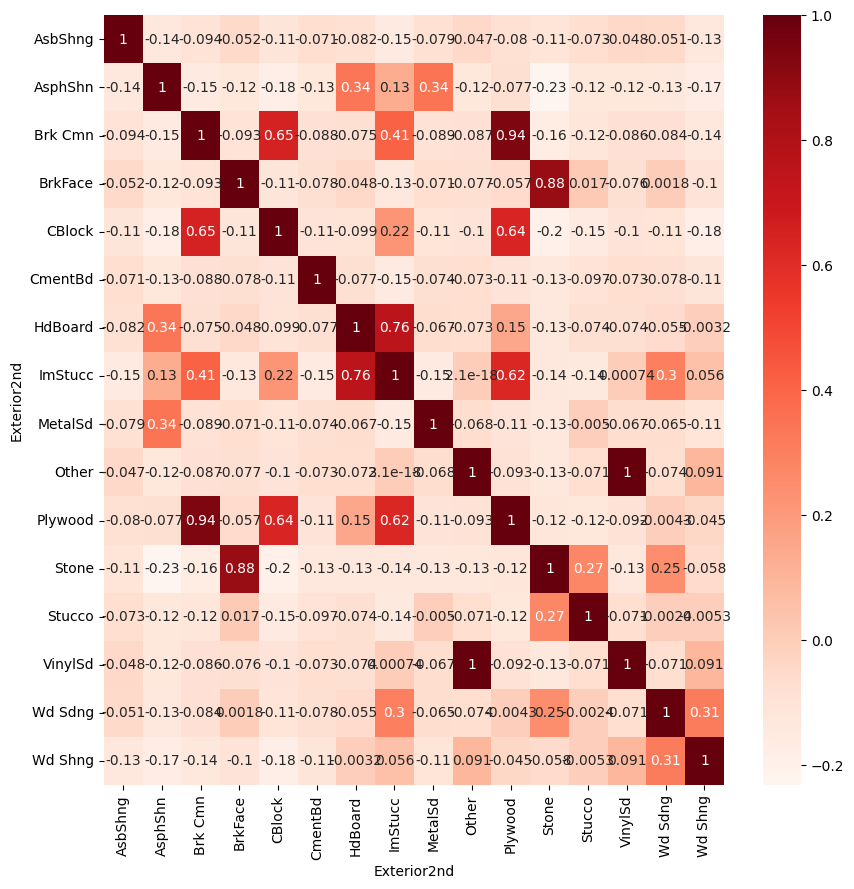

In [100]:
## plotting correlation matrix for that
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 10))
sns.heatmap(Exteriors_df.corr(), annot = True, cmap = 'Reds')

In [101]:
df.shape

(2908, 187)

Here is the corelation matrix that shows that Exterior 1st and Exterior 2nd are almost representing same data so Exterior1st , Exterior2nd can be selected as a single column <code>Exteriors</code>

In [102]:
print(f.find_columns(df,['Exterior1st', 'Exterior2nd']))
df.drop(f.find_columns(df,['Exterior1st', 'Exterior2nd']), axis = 1, inplace = True)
df.shape


['__Exterior1st_BrkFace', '__Exterior1st_CemntBd', '__Exterior1st_HdBoard', '__Exterior1st_MetalSd', '__Exterior1st_Other', '__Exterior1st_Plywood', '__Exterior1st_VinylSd', '__Exterior1st_Wd Sdng', '__Exterior1st_WdShing', '__Exterior2nd_CmentBd', '__Exterior2nd_HdBoard', '__Exterior2nd_MetalSd', '__Exterior2nd_Other', '__Exterior2nd_Plywood', '__Exterior2nd_VinylSd', '__Exterior2nd_Wd Sdng', '__Exterior2nd_Wd Shng']


(2908, 170)

In [103]:
## Adding Exterior column
df['Exterior'] = old_df['Exterior1st']
print(df['Exterior'].value_counts())
df.shape

Exterior
VinylSd    1024
MetalSd     449
HdBoard     442
Wd Sdng     407
Plywood     219
CemntBd     126
BrkFace      86
WdShing      56
AsbShng      43
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64


(2908, 171)

Introductin others for this where it's less than 50

In [104]:
## importing function file for using the other file
f.introduce_other(df, 'Exterior', 50)
print(df['Exterior'].value_counts())

Exterior
VinylSd    1024
MetalSd     449
HdBoard     442
Wd Sdng     407
Plywood     219
CemntBd     126
Other        99
BrkFace      86
WdShing      56
Name: count, dtype: int64


In [105]:
f.find_columns(df, ['Exterio'])

['Exterior']

In [106]:
## applying OHE on this column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
encoded_exterior = encoder.fit_transform(df[['Exterior']])
encoded_exterior_df = pd.DataFrame(encoded_exterior, columns= encoder.get_feature_names_out())

## appending this df to main df
df = pd.concat([df, encoded_exterior_df ], axis = 1)
df.drop('Exterior', axis = 1, inplace = True)
df.shape

(2908, 179)

Checking Garage columns since they may very corelated

In [107]:
garage_cols = [col for col in old_df.columns if "Garage" in col]
old_df[garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2.0,548.0,TA,TA
1,Attchd,1976.0,RFn,2.0,460.0,TA,TA
2,Attchd,2001.0,RFn,2.0,608.0,TA,TA
3,Detchd,1998.0,Unf,3.0,642.0,TA,TA
4,Attchd,2000.0,RFn,3.0,836.0,TA,TA
...,...,...,...,...,...,...,...
2903,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
2904,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2905,Detchd,1960.0,Unf,2.0,576.0,TA,TA
2906,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage


Now if we look then <code>GarageCars</code> and <code>GarageArea</code> anyone feature can be removed since they are giving kind of same information (size of Garage).

In [108]:
## checking corelation with SalePrice of both the features
print(old_df.GarageCars.corr(old_df.SalePrice))  ## Corelation with GarageCars
print(old_df.GarageArea.corr(old_df.SalePrice))  ## Corelation with GarageArea

0.31475784994297495
0.3116863467607722


Corelation of Boths are quite same but still GarageCars is making little bit more sense so dropping GarageArea columns

In [109]:
df.drop('GarageArea', axis = 1, inplace = True)

For GarageType, GarageYrBuilt, GarageFinish i will create a new column based on condition<br>
<li><code>Modern Finished Garage:</code> Built after 2000 and has a Fin finish.</li>
<li><code>Modern Unfinished Garage:</code>  Built after 2000 but has Unf or RFn finish.</li>
<li><code>Old Finished Garage:</code>  Built before 2000 with a Fin finish.</li>
<li><code>Old Unfinished Garage:</code>  Built before 2000 with Unf or RFn finish.</li>
<li><code>No Garage.</code> <br>
after that will train data with new category and the old one and will see which is performing better

In [110]:
old_df[f.find_columns(old_df, ['Garage'])]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2.0,548.0,TA,TA
1,Attchd,1976.0,RFn,2.0,460.0,TA,TA
2,Attchd,2001.0,RFn,2.0,608.0,TA,TA
3,Detchd,1998.0,Unf,3.0,642.0,TA,TA
4,Attchd,2000.0,RFn,3.0,836.0,TA,TA
...,...,...,...,...,...,...,...
2903,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
2904,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2905,Detchd,1960.0,Unf,2.0,576.0,TA,TA
2906,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage


In [111]:
# Define a function to categorize garages
def categorize_garage(row):
    if row['GarageType'] == 'No Garage':
        return 'No Garage'
    elif row['GarageYrBlt'] > 2000:
        if row['GarageFinish'] == 'Fin':
            return 'Modern Finished Garage'
        elif row['GarageFinish'] in ['Unf', 'RFn']:
            return 'Modern Unfinished Garage'
    elif row['GarageYrBlt'] <= 2000:
        if row['GarageFinish'] == 'Fin':
            return 'Old Finished Garage'
        elif row['GarageFinish'] in ['Unf', 'RFn']:
            return 'Old Unfinished Garage'
    return 'Unknown'  # Fallback for unexpected cases

# Apply the function to create the new column
df['GarageRating'] = old_df.apply(categorize_garage, axis=1)

In [112]:
df['GarageRating']

0       Modern Unfinished Garage
1          Old Unfinished Garage
2       Modern Unfinished Garage
3          Old Unfinished Garage
4          Old Unfinished Garage
                  ...           
2903                   No Garage
2904       Old Unfinished Garage
2905       Old Unfinished Garage
2906                   No Garage
2907         Old Finished Garage
Name: GarageRating, Length: 2908, dtype: object

In [113]:
## Now adding Label Encoding For GarageRating Column
df['GarageRating'] = df['GarageRating'].map(
    {
        'Modern Finished Garage': 4,
        'Modern Unfinished Garage': 3,
        'Old Finished Garage': 2,
        'Old Unfinished Garage': 1,
        'No Garage': 0,
        'Unknown': 0
    }
)

df['GarageRating'].value_counts()

GarageRating
1    1651
3     382
4     370
2     348
0     157
Name: count, dtype: int64

In [114]:
f.find_columns(df, ['GarageType', 'GarageYrBlt', 'GarageFinish'])

['GarageYrBlt',
 'GarageFinish',
 '__GarageType_Attchd',
 '__GarageType_Basment',
 '__GarageType_BuiltIn',
 '__GarageType_Detchd',
 '__GarageType_No Garage',
 '__GarageType_Other']

Now creating two dataFram one with Garage columns one with only GarageRating column

In [115]:
Garage_rating_df = df.drop(f.find_columns(df, ['GarageType', 'GarageYrBlt', 'GarageFinish']), axis = 1)  ## contains GarageRating only
No_Garage_rating_df = df.drop('GarageRating', axis = 1) ## Does not contain GarageRating

In [116]:
Garage_rating_df.shape

(2908, 171)

In [117]:
No_Garage_rating_df.shape

(2908, 178)

In [118]:
# Adding SalePrice into my main data for further splitting process
df['SalePrice'] = old_df['SalePrice']

In [119]:
## training the data and get accuracy
## Importing Models to check for accuracy
# Import popular regression models
import numpy as np
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Create a dictionary of models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}



# Evaluation metrics for regression
from sklearn.metrics import root_mean_squared_error as rmse, r2_score
from sklearn.model_selection import cross_val_score

# Function to evaluate models
def evaluate_models(df, models):

    X , Y = df.drop('SalePrice', axis = 1), df.SalePrice   ## for cross val chcekcing
    ## Splitting traintest data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1,  random_state = 42)
  

    ## scaling the X data
    X_scaled = StandardScaler().fit_transform(X)
    X = pd.DataFrame(X_scaled, columns= X.columns)

    ## scaling train test data
    ss2 = StandardScaler()
    X_train_scaled = ss2.fit_transform(X_train)
    X_test_scaled = ss2.transform(X_test)
    X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
    X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

    ## dic for storing result
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        ## doing cross validation
        cv_score = np.mean(cross_val_score(model, X , Y, cv = 5))
        
        # Calculate metrics
        rmse_train = rmse(y_train, y_pred_train)
        rmse_test = rmse(y_test, y_pred_test)
        R2_train = r2_score(y_train, y_pred_train)
        R2_test = r2_score(y_test, y_pred_test)
        
        results[name] = {
            'rmse_train': rmse_train,
            'rmse_test': rmse_test,
            'R2_train' : R2_train,
            'R2_test': R2_test,
            'cross_val_score': cv_score
        }
    print(X.shape)
    
    return pd.DataFrame(results).T

# Evaluate all models for with Garage column
# evaluate_models(Garage_rating_df , models)



In [120]:
# evaluate_models(No_Garage_rating_df , models)

if we compare then data with GarageRating feature having little bit more accuracy so for further process choosing that data only

In [121]:
df = Garage_rating_df
df.shape

(2908, 171)

Again checking rest GarageColumns

In [122]:
df[f.find_columns(df, ['Garage'])]

,GarageCars,GarageQual,GarageCond,GarageRating
0,2.0,3,3,3
1,2.0,3,3,1
2,2.0,3,3,3
3,3.0,3,3,1
4,3.0,3,3,1
...,...,...,...,...
2903,0.0,0,0,0
2904,1.0,3,3,1
2905,2.0,3,3,1
2906,0.0,0,0,0


In [123]:
df['GarageRating'].value_counts()

GarageRating
1    1651
3     382
4     370
2     348
0     157
Name: count, dtype: int64

In [124]:
df['GarageQual'].value_counts()

GarageQual
3    2597
0     157
2     122
4      24
1       5
5       3
Name: count, dtype: int64

In [125]:
cross_checking = df[(df.GarageQual == 0)][['GarageCars', 'GarageQual', 'GarageCond']]
cross_checking[cross_checking.GarageCars != 0]

,GarageCars,GarageQual,GarageCond
2121,1.0,0,0


Here one row is not making sense if GarageQual is 0 means GarageCars should also be zero.

In [126]:
## changing value to 0 on index 2121
df.loc[2121, 'GarageCars'] = 0

In [127]:
print(df['GarageCars'].corr(df.SalePrice), df['GarageCond'].corr(df.SalePrice), df['GarageQual'].corr(df.SalePrice), df['GarageRating'].corr(df.SalePrice))

0.31481829714346937 0.13977869140461524 0.15342881009449252 0.26721161803720694


In [128]:
df['GarageScore'] = (
    df['GarageCars'] * 15 +  # Give more weight to capacity
    df['GarageQual']  +
    df['GarageCond']  + 
    df['GarageRating'] * 12 # Give some importance to rating
)

df.GarageScore.corr(df.SalePrice)

0.32275511452892314

In [129]:
test_df = df.drop(['GarageCars', 'GarageQual', 'GarageCond', 'GarageRating'], axis = 1)
# evaluate_models(test_df, models)

So after removing plenty of columns accuracy is still quite same so we can consider this change in our data

In [130]:
df.drop(['GarageCars', 'GarageQual', 'GarageCond', 'GarageRating'], axis = 1, inplace = True)
df.shape

(2908, 168)

Now Let's deal with <code>Bsmt</code> Things

In [131]:
df[f.find_columns(df, ['Bsmt'])]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,4,3,1,6,6.561031,1,0.000000,5.017280,6.753438,1.0,0.0
1,4,3,4,5,6.886532,1,0.000000,5.652489,7.141245,0.0,1.0
2,4,3,2,6,6.188264,1,0.000000,6.075346,6.825460,1.0,0.0
3,3,4,1,5,5.379897,1,0.000000,6.293419,6.629363,1.0,0.0
4,4,3,3,6,6.486161,1,0.000000,6.196444,7.044033,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2903,4,3,1,1,0.000000,1,0.000000,6.860664,6.860664,0.0,0.0
2904,4,3,1,5,6.673298,3,5.099866,6.380123,7.341484,0.0,0.0
2905,3,4,1,6,5.620401,1,0.000000,6.777647,7.050123,1.0,0.0
2906,3,3,2,6,3.912023,3,6.937314,0.000000,6.983790,0.0,1.0


Here i can do 2 changes instantly that is removing <code>TotalBsmtSF</code> since it is nothing but sum of BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF and second Create Total BsmtBathrooms by BsmtFullBath and BsmtHalfBath

In [132]:
df.drop('TotalBsmtSF', axis = 1, inplace = True)
df.shape

(2908, 167)

In [133]:
# evaluate_models(df, models)

We can consider this change since accuracy is quiet same

In [134]:
df.drop(['BsmtHalfBath', 'BsmtFullBath'], axis = 1, inplace = True)
df.shape

(2908, 165)

Let's except of two BsmtFinSF create two 

In [135]:
print(df.BsmtFinSF1.corr(df.SalePrice), df.BsmtFinSF2.corr(df.SalePrice))


0.18523802242416215 -0.04737502824086848


In [136]:
print(df.BsmtFinSF1.corr(df.BsmtFinSF2))
print(df.BsmtFinSF2.corr(df.SalePrice))
print(df.BsmtCond.corr(df.BsmtFinSF2))

0.1854559636870516
-0.04737502824086848
0.09336785401068638


Since BsmtFinSF2 seems very irrelevant so removing this column can be a good idea

In [137]:
df.drop('BsmtFinSF2', axis = 1, inplace = True)

In [138]:
print(df.BsmtCond.corr(df.SalePrice))
print(df.BsmtQual.corr(df.SalePrice))
print(df.BsmtExposure.corr(df.SalePrice))

0.2138685278980956
0.5864849167207999
0.37244117982094616


Let's check correlation matrix to find any interrealtion features

In [139]:
df[f.find_columns(df, ['Bsmt'])].corr()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF
BsmtQual,1.000000,0.634352,0.398934,0.378231,0.207657,0.086008,0.374713
BsmtCond,0.634352,1.000000,0.256523,0.299387,0.235662,0.243270,0.387659
BsmtExposure,0.398934,0.256523,1.000000,0.347608,0.276546,0.126610,-0.030899
BsmtFinType1,0.378231,0.299387,0.347608,1.000000,0.852611,0.097796,-0.120660
BsmtFinSF1,0.207657,0.235662,0.276546,0.852611,1.000000,0.187407,-0.265470
BsmtFinType2,0.086008,0.243270,0.126610,0.097796,0.187407,1.000000,-0.120293
BsmtUnfSF,0.374713,0.387659,-0.030899,-0.120660,-0.265470,-0.120293,1.000000


Since BsmtQual and BsmtCond itself corelated so we will better create another feature to get rid off any multicoliniarity

In [140]:
## Now creating BsmtRatingColumn as 
df['BsmtRating'] = (df['BsmtCond'] + df['BsmtQual']*7 + df['BsmtExposure']*3)
df['BsmtRating'].corr(df.SalePrice)

0.5906340650124057

Now we created a new column which is corealted 59% with my Target

In [141]:
test_df = df.drop(['BsmtCond', 'BsmtQual', 'BsmtExposure'], axis = 1)
# evaluate_models(test_df, models)

In [142]:
df[f.find_columns(df, ['Bsmt'])]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,BsmtRating
0,4,3,1,6,6.561031,1,5.017280,34
1,4,3,4,5,6.886532,1,5.652489,43
2,4,3,2,6,6.188264,1,6.075346,37
3,3,4,1,5,5.379897,1,6.293419,28
4,4,3,3,6,6.486161,1,6.196444,40
...,...,...,...,...,...,...,...,...
2903,4,3,1,1,0.000000,1,6.860664,34
2904,4,3,1,5,6.673298,3,6.380123,34
2905,3,4,1,6,5.620401,1,6.777647,28
2906,3,3,2,6,3.912023,3,0.000000,30


LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [143]:
df.drop(f.find_columns(df, ['LotShape']), axis = 1, inplace = True)
df['LotShape'] = old_df['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
# evaluate_models(df, models)

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [144]:
df.drop(f.find_columns(df, ['LandSl']), axis = 1, inplace = True)

In [145]:
df['LandSlope'] = old_df['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})
# evaluate_models(df, models)

	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [146]:
df[['OverallCond', 'OverallQual']] = df[['OverallCond', 'OverallQual']].astype('int')

In [147]:
print(old_df.OverallQual.corr(old_df.SalePrice), old_df.OverallCond.corr(old_df.SalePrice))

0.36805248248149586 -0.03847105944495748


Since OveallCond is not mattering for target column so deleting it

In [148]:
df['HouseCondition'] = df['OverallQual']
df.drop(['OverallQual', 'OverallCond'], axis = 1, inplace = True)
df.HouseCondition.corr(df.SalePrice)


0.36805248248149586

In [149]:
df.RemodelAge.unique()
print(df.RemodelAge.corr(df.SalePrice))

-0.24480706830989518


In [150]:
# Create a new feature 'RemodelAgeCategory' based on conditions
df['RemodelAge'] = df['RemodelAge'].map(
    lambda x: 4 if x < 10 else
              3 if x < 25 else
              2 if x < 50 else
              1
)

df.RemodelAge.corr(df.SalePrice)

0.22435085451352055

In [151]:
print(df.HouseAge.corr(df.SalePrice))
df['HouseAge'].value_counts()

df['HouseAge'] = df['HouseAge'].map(
    lambda x : 
    1 if x <= 10 else
    2 if x < 25 else
    3 if x < 50 else
    4 if x < 100 else 5

)

df.HouseAge.corr(df.SalePrice)

-0.261676701832559


-0.26385004316342986

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [152]:
print(old_df.groupby('Foundation').SalePrice.mean().sort_values(ascending = False))
print(old_df.groupby('Foundation').SalePrice.median().sort_values(ascending = False))


Foundation
PConc     202919.911877
Wood      190480.000000
Stone     170570.272727
CBlock    165666.390739
BrkTil    153437.265372
Slab      146628.978723
Name: SalePrice, dtype: float64
Foundation
PConc     183900.0
Wood      164000.0
CBlock    149900.0
Slab      139600.0
BrkTil    137500.0
Stone     137000.0
Name: SalePrice, dtype: float64


In [153]:
df.drop(f.find_columns(df, ['Founda']), axis = 1, inplace = True)
df['Foundation'] = old_df['Foundation'].map({'BrkTil': 2, 'CBlock': 3, 'PConc': 6, 'Slab': 1, 'Stone': 4, 'Wood': 5})
df.Foundation.corr(df.SalePrice)

0.25850211118528593

In [154]:
df.shape

(2908, 155)

In [155]:
df.GrLivArea.corr(df.SalePrice)

0.6943703570457164

In [156]:
df['1stFlrSF'].corr(df.SalePrice), df['2ndFlrSF'].corr(df.SalePrice)

(0.5924676660261262, 0.16537707811246635)

In [157]:
df.drop('2ndFlrSF', axis = 1, inplace = True)

In [158]:
df.drop('LowQualFinSF', axis = 1, inplace= True)

In [159]:
df.shape

(2908, 153)

In [160]:
df['TotalAboveBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
df.drop(['FullBath', 'HalfBath'], axis = 1, inplace = True)


In [161]:
# evaluate_models(df, models)

In [162]:
df.PoolQC.value_counts()

PoolQC
0    2894
1      14
Name: count, dtype: int64

In [163]:
## deleting PoolArea and PoolQC column
df.drop(['PoolArea', 'PoolQC'], axis = 1, inplace = True)
df.shape

(2908, 150)

In [164]:
df.drop(f.find_columns(df, ['Fence']), axis = 1, inplace = True)

In [165]:
df['Fence'] = old_df['Fence'].map(lambda x : 0 if x == "No Fence" else 1)
df.Fence.value_counts()

Fence
0    2345
1     563
Name: count, dtype: int64

In [166]:
print(df.MiscVal.corr(df.SalePrice))
df.drop('MiscVal', axis = 1, inplace = True)

-0.0642875914126586


In [167]:
# evaluate_models(df, models)

In [168]:
df['TotalProchDeckArea'] = df['3SsnPorch'] + df['OpenPorchSF'] + df['ScreenPorch'] + df['EnclosedPorch']
df.TotalProchDeckArea.corr(df.SalePrice)

0.27826598904471783

In [169]:
df.drop(['3SsnPorch', 'OpenPorchSF', 'ScreenPorch','EnclosedPorch'], axis = 1, inplace = True)

In [170]:
# evaluate_models(df, models)

After removing plenty of featues accuracy is quite the same so we can now use GridSearchCV for best parameters

Now Let's check some outliers and try to remove or clip them

In [171]:
Q1 = df['LotFrontage'].quantile(0.25)
Q3 = df['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_df = df[(df['LotFrontage'] >= lower_bound) & (df['LotFrontage'] <= upper_bound)]  ## removing outliers

In [172]:
# evaluate_models(test_df, models)

In [173]:
Q1 = old_df['LotFrontage'].quantile(0.25)
Q3 = old_df['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
old_df['LotFrontage'] = old_df['LotFrontage'].clip(lower = lower_bound, upper = upper_bound)
old_df.LotFrontage.max(), old_df.LotFrontage.min()

(110.0, 30.0)

In [174]:
from sklearn.preprocessing import FunctionTransformer
log_LotFrontage = FunctionTransformer(np.log1p).fit_transform(old_df['LotFrontage'])
df['looged_LotFrontage'] = log_LotFrontage
df.LotFrontage.value_counts()

df['NormalLotFrontage'] = old_df['LotFrontage']
df.NormalLotFrontage.value_counts()

NormalLotFrontage
60.0    285
70.0    146
80.0    137
50.0    114
69.4    112
       ... 
38.0      2
52.5      2
66.6      2
92.9      1
68.9      1
Name: count, Length: 181, dtype: int64

In [175]:
logged_lotFrontage_df = df.drop('NormalLotFrontage', axis = 1)
noraml_LotFrontage = df.drop('LotFrontage', axis = 1)

In [176]:
# evaluate_models(logged_lotFrontage_df, models)

In [177]:
# evaluate_models(noraml_LotFrontage, models)

It's looks removing outlier is better option here

In [178]:
Q1 = df['LotFrontage'].quantile(0.25)
Q3 = df['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['LotFrontage'] >= lower_bound) & (df['LotFrontage'] <= upper_bound)]  ## removing outliers
df.LotFrontage.max(), df.LotFrontage.min()

(4.812184355372417, 3.6888794541139363)

In [179]:
df.shape

(2687, 148)

So we removed around 300 + rows

<Axes: xlabel='LotArea', ylabel='SalePrice'>

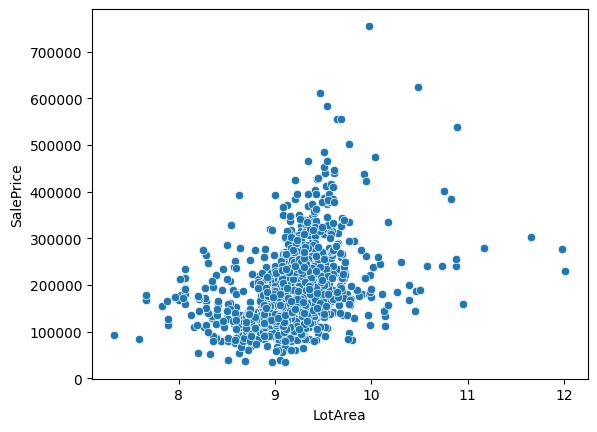

In [180]:
sns.scatterplot(data= df, x = 'LotArea', y = 'SalePrice')


In [181]:
Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound =  Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

## first checking the max and min of LotArea
print(df.LotArea.min(), df.LotArea.max())

df = df[(df['LotArea'] >= lower_bound) & (df['LotArea'] <= upper_bound)]
df.shape

7.335633981927201 12.011644093954345


(2500, 148)

In [182]:
evaluate_models(df, models)

(2500, 147)


,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Decision Tree,0.000000,22516.378519,1.000000,0.902505,0.906159
Random Forest,7295.575962,16848.026117,0.990862,0.945414,0.938433
Gradient Boosting,19740.625353,21913.229721,0.933095,0.907658,0.902880


<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

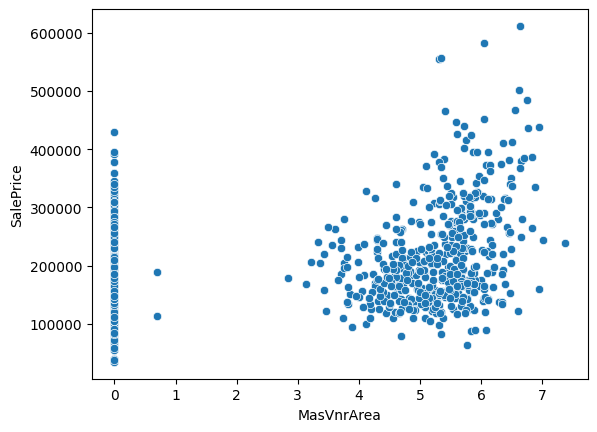

In [183]:
sns.scatterplot(data = df, x = 'MasVnrArea', y  = 'SalePrice')

Let's leave this column

In [184]:
Q1 = df['MasVnrArea'].quantile(0.25)
Q3 = df['MasVnrArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound =  Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

## first checking the max and min of LotArea
print(df.MasVnrArea.min(), df.MasVnrArea.max())

df = df[(df['MasVnrArea'] >= lower_bound) & (df['MasVnrArea'] <= upper_bound)]
df.shape

0.0 7.3783837129967145


(2500, 148)

Looks no outliers are there

Now Let's apply Grid Search CV for best parameters for Random Forest since it's accuracy is highest

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Example dataset (replace with your own data)
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis = 1   ), df.SalePrice, test_size=0.2, random_state=42)

## scaling the data
ss =  StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## originating back
X_train = pd.DataFrame(X_train, X_train.columns)
X_test = pd.DataFrame(X_test, X_test.columns)
# Random Forest Classifier
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [20, 30, 50, 80,  100, 150, 200],        # Number of trees
    'max_depth': [10, 20, 30, 40],      # Tree depth
    'min_samples_split': [2, 5, 10],      # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],        # Minimum samples in a leaf
    'max_features': ['auto', 'sqrt'],     # Number of features to consider for best split
    'bootstrap': [True, False]            # Bootstrap sampling
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validated R² Score:", best_score)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error:", mse)
print("Test R² Score:", r2)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2520 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1568 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    v

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validated R² Score: 0.8780971661694892
Test Mean Squared Error: 509920423.6203452
Test R² Score: 0.8937691785406423


by GridSearchCV we are getting even less accuracy so condiering the above one as the final data and accuracy

<h1 style = 'color:green; text-align:center; font-weight: bold'>Project End</h1>